In [29]:
import tensorflow as tf

from keract import get_activations
from keract import display_activations

import numpy as np

print(tf.__version__)

2.8.0


In [10]:
# Gdrive folder https://drive.google.com/drive/folders/1bnT31_CNpI9u70STy6P-_GXRo38-_iEy

# model https://drive.google.com/file/d/1SoIxGc-T8VOi3pOhMCO-pM6Py5BLt3G_/view?usp=sharing

# train https://drive.google.com/file/d/1Rjl3i86XTnDEKGUYT3Pjg8JfdBIdHt6y/view?usp=sharing
# test https://drive.google.com/file/d/1e65FERfU4feXZ8FjB9q5JEhzPazjQXcn/view?usp=sharing
# validation https://drive.google.com/file/d/1f_Prjy7IChPW7FdZvWs0dsWh0DGBr43X/view?usp=sharing

# You could retrieve the files from the above folders using gdown
# pip install gdown
# gdown file_id -O destination_path
# !gdown 14uY6ilSz8CwGiukeTciv20MdKTEI6EO 

In [18]:
download_path = '../../../project_data/downloads/'
!gdown 1SoIxGc-T8VOi3pOhMCO-pM6Py5BLt3G_ -O download_path # model: 500_epochs.h5
!gdown 1Rjl3i86XTnDEKGUYT3Pjg8JfdBIdHt6y -O download_path # training set: train.npz
!gdown 1e65FERfU4feXZ8FjB9q5JEhzPazjQXcn -O download_path # test set: test.npz
!gdown 1f_Prjy7IChPW7FdZvWs0dsWh0DGBr43X -O download_path # validation set: validation.npz

Downloading...
From: https://drive.google.com/uc?id=1SoIxGc-T8VOi3pOhMCO-pM6Py5BLt3G_
To: /Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/downloads/500_epochs.h5
100%|██████████████████████████████████████| 5.29M/5.29M [00:01<00:00, 2.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Rjl3i86XTnDEKGUYT3Pjg8JfdBIdHt6y
To: /Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/downloads/train.npz
100%|████████████████████████████████████████| 133M/133M [00:34<00:00, 3.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e65FERfU4feXZ8FjB9q5JEhzPazjQXcn
To: /Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/downloads/test.npz
100%|██████████████████████████████████████| 16.6M/16.6M [00:02<00:00, 7.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f_Prjy7IChPW7FdZvWs0dsWh0DGBr43X
To: /Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/downloads/validati

In [27]:
!ls '../../../project_data/downloads/'

500_epochs.h5  test.npz       train.npz      validation.npz


In [36]:
test = np.load(download_path+'test.npz')
test.files

['test_images', 'test_labels']

In [37]:
test_images = test['test_images']
test_labels = test['test_labels']

In [39]:
# load the model and run a summary
model = tf.keras.models.load_model(download_path+'500_epochs.h5')
model.summary()

Metal device set to: Apple M1


2022-05-15 08:59:06.888969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 08:59:06.889169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [40]:
#check test accuracy of the trained model:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc * 100.0:.2f}%')

2022-05-15 08:59:37.147032: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-15 08:59:37.216050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 - 1s - loss: 0.9818 - accuracy: 0.6342 - 1s/epoch - 13ms/step

Test accuracy: 63.42%


In [54]:
# Get a random image from the test set
ind = np.random.randint(len(test_images))
img = test_images[ind]

true_label = test_labels[ind]
true_label

3

## Predict

In [66]:
# Get a random image from the test set
ind = np.random.randint(len(test_images))
img = test_images[ind]

true_label = test_labels[ind]
true_label

4

In [67]:
#compare the shape of the image with the input shape of the model
print(img.shape, model.input_shape)

(48, 48, 1) (None, 48, 48, 1)


In [68]:
# function to expand dimensions of a given image to match the model input shape
def expand_img_dims(img_array):
    import numpy as np
    return np.expand_dims(img_array, axis=0)

In [69]:
img = expand_img_dims(img)
print(img.shape, model.input_shape)

(1, 48, 48, 1) (None, 48, 48, 1)


In [70]:
model.predict(img)

array([[4.2994786e-02, 1.2967111e-04, 3.6780000e-02, 7.0801214e-03,
        5.2515292e-01, 3.8247716e-04, 3.8748005e-01]], dtype=float32)

## Activation Maps

conv2d_input (1, 48, 48, 1) 


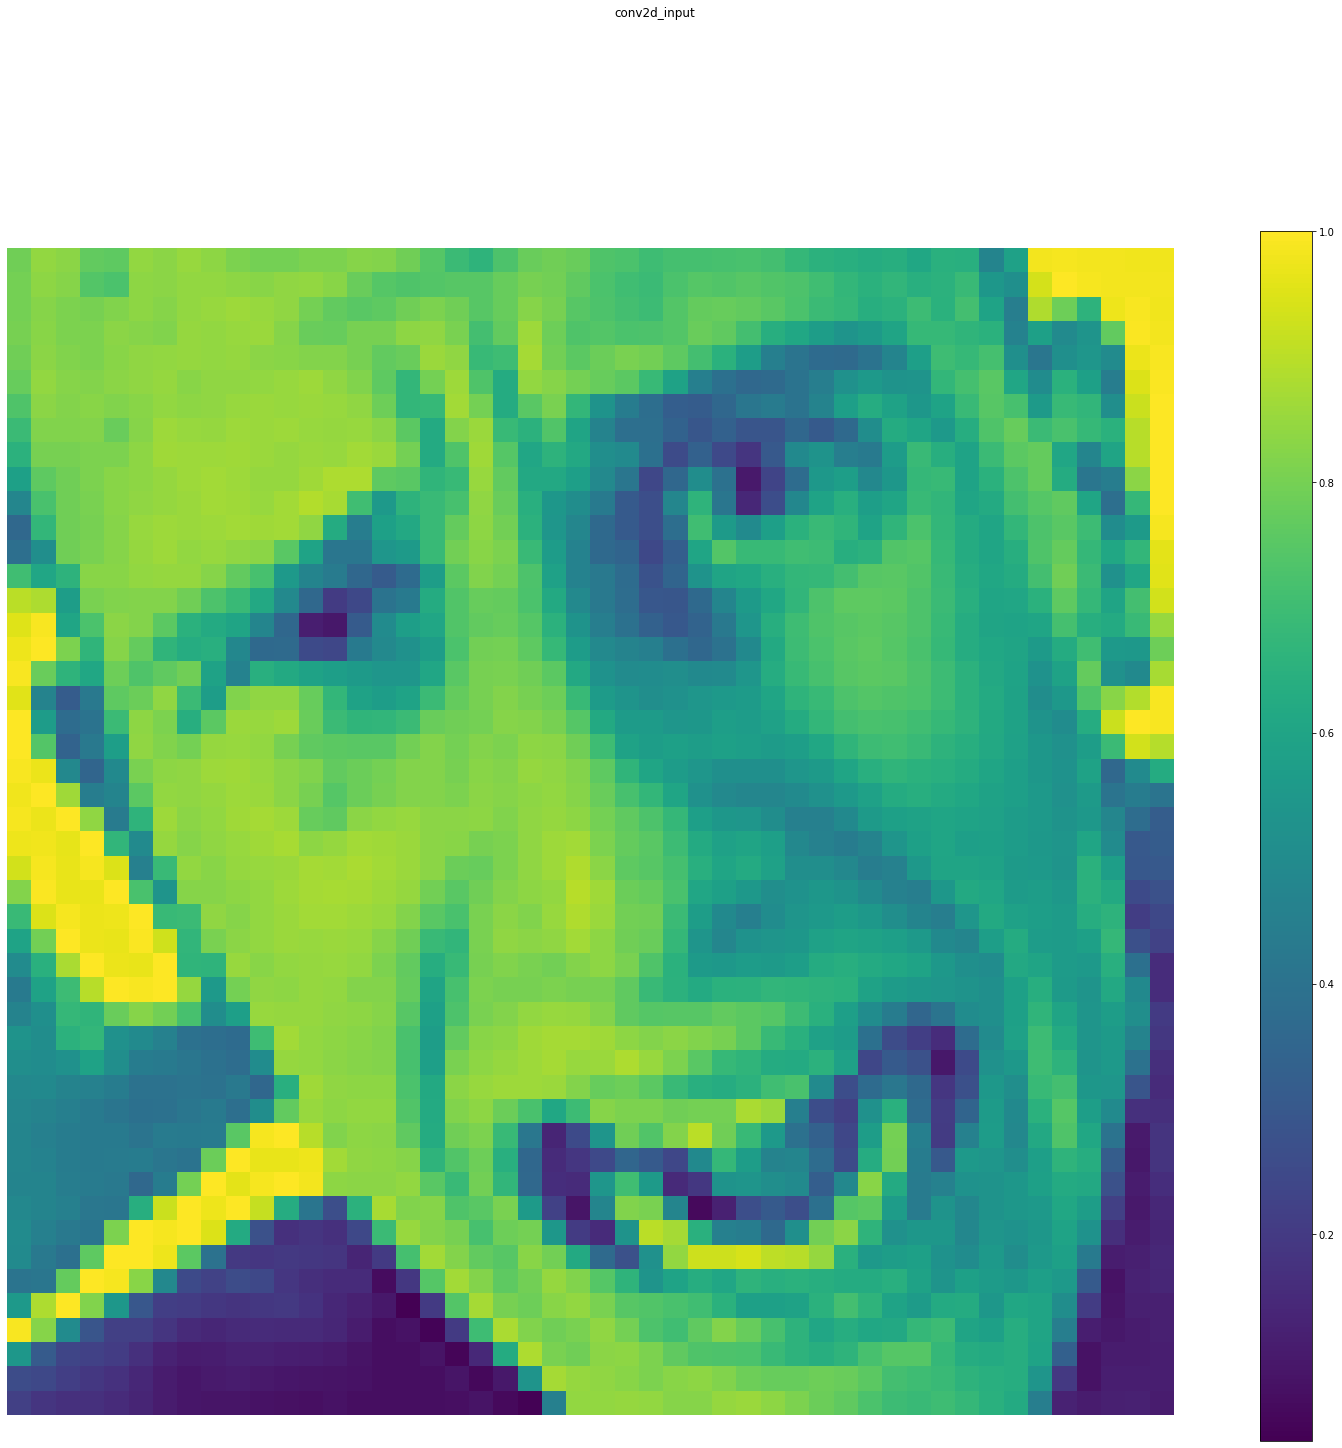

conv2d (1, 48, 48, 32) 


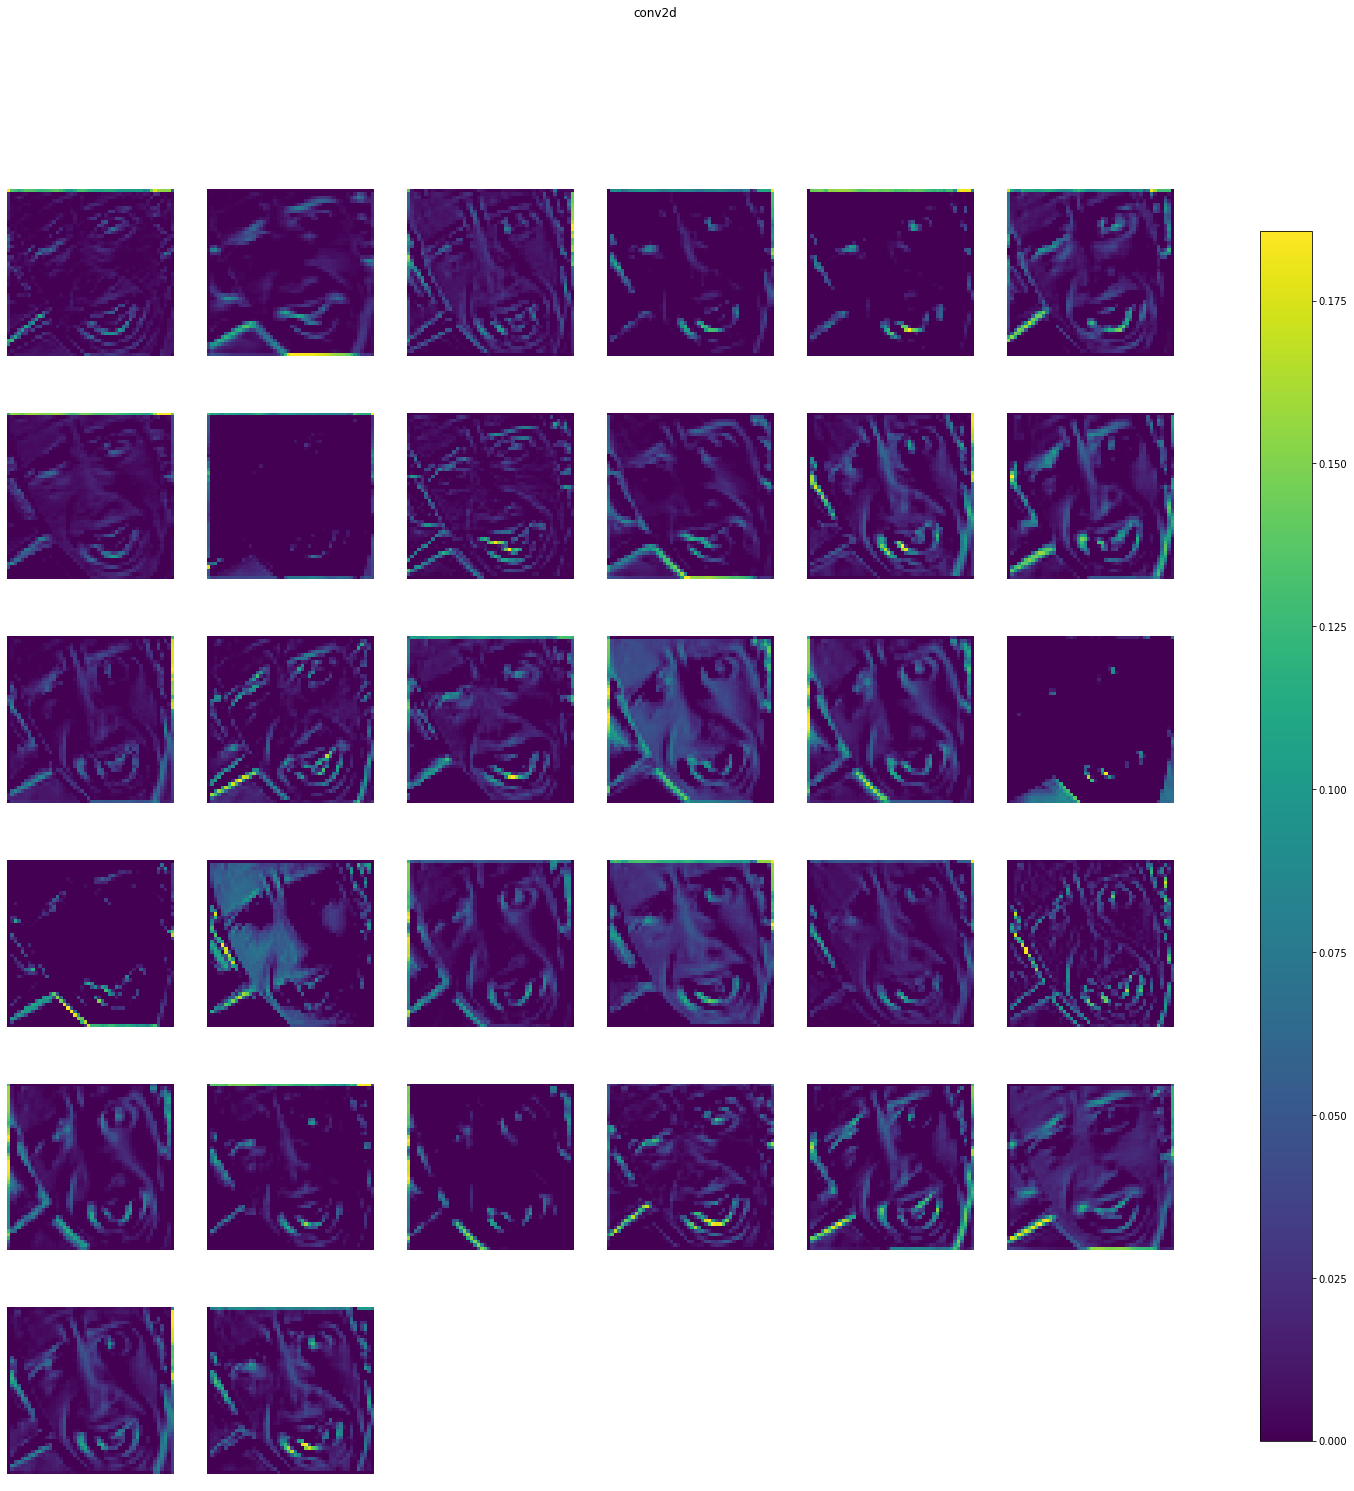

max_pooling2d (1, 24, 24, 32) 


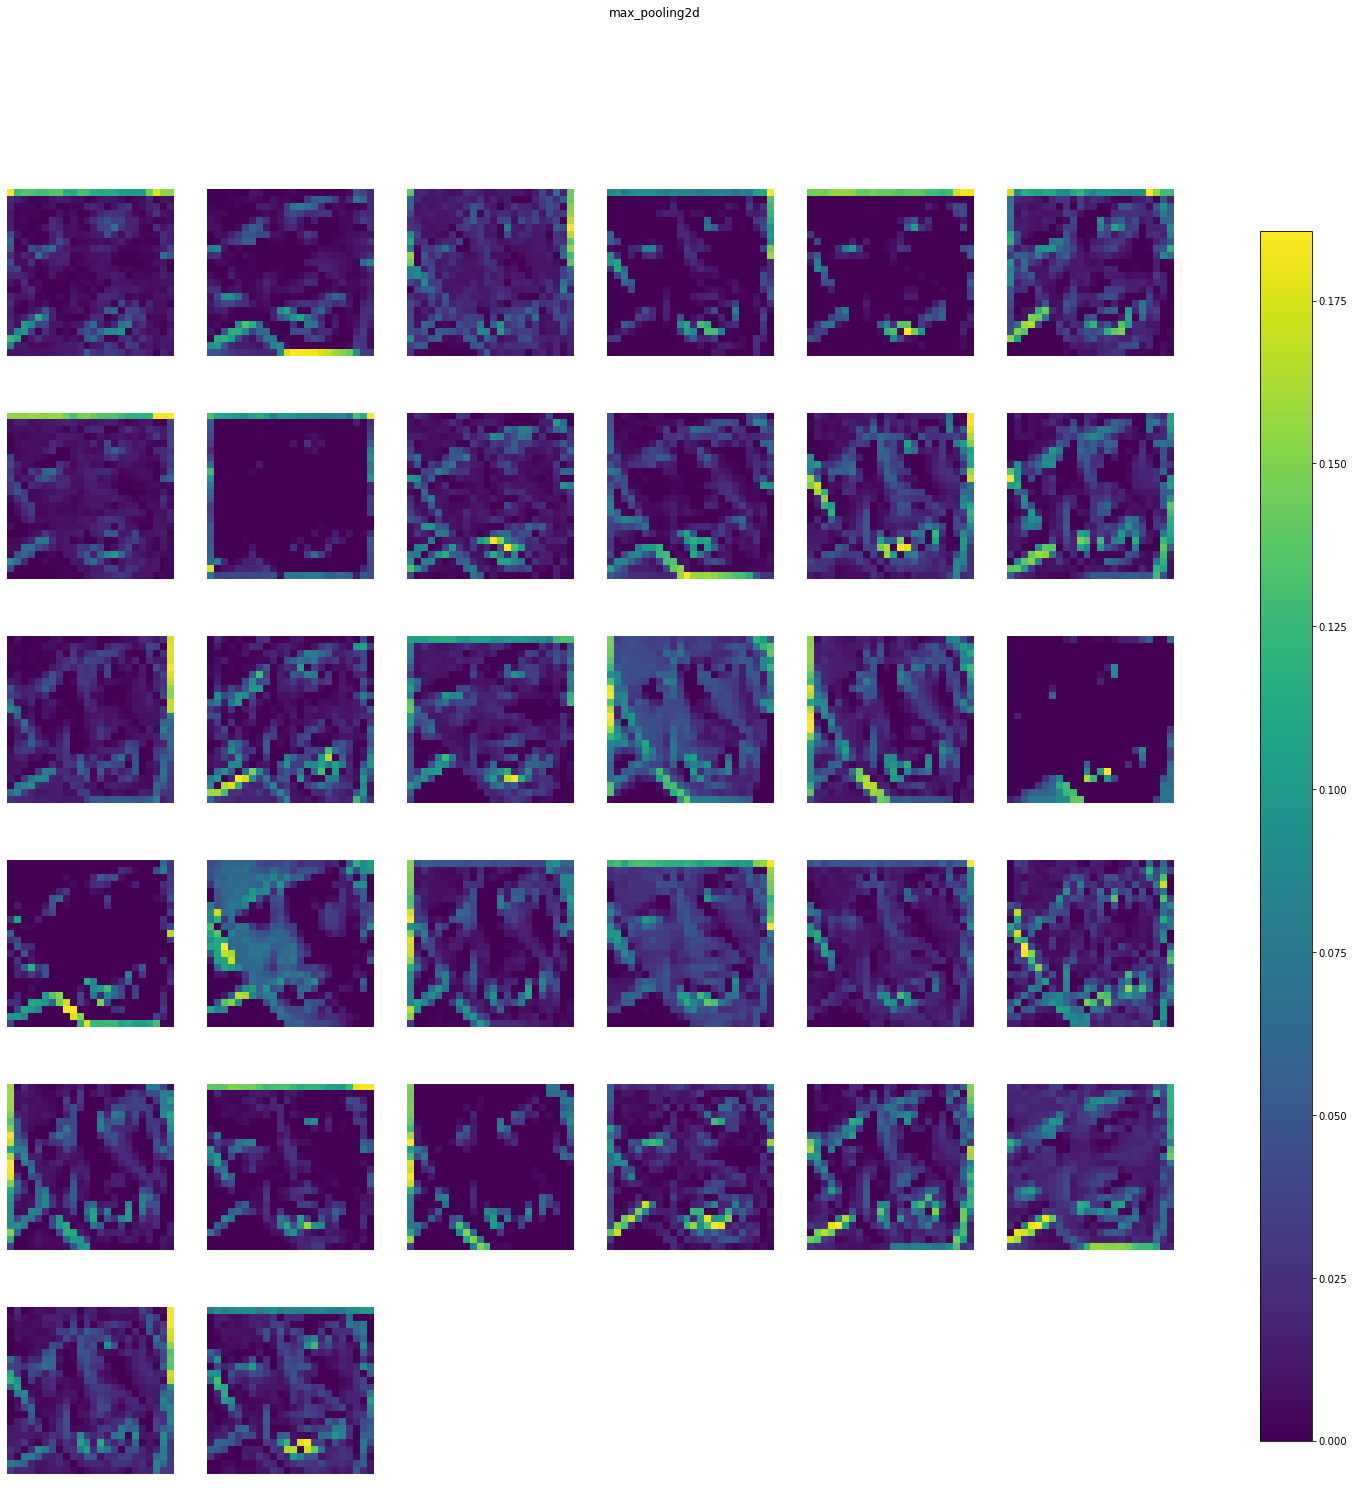

conv2d_1 (1, 22, 22, 64) 


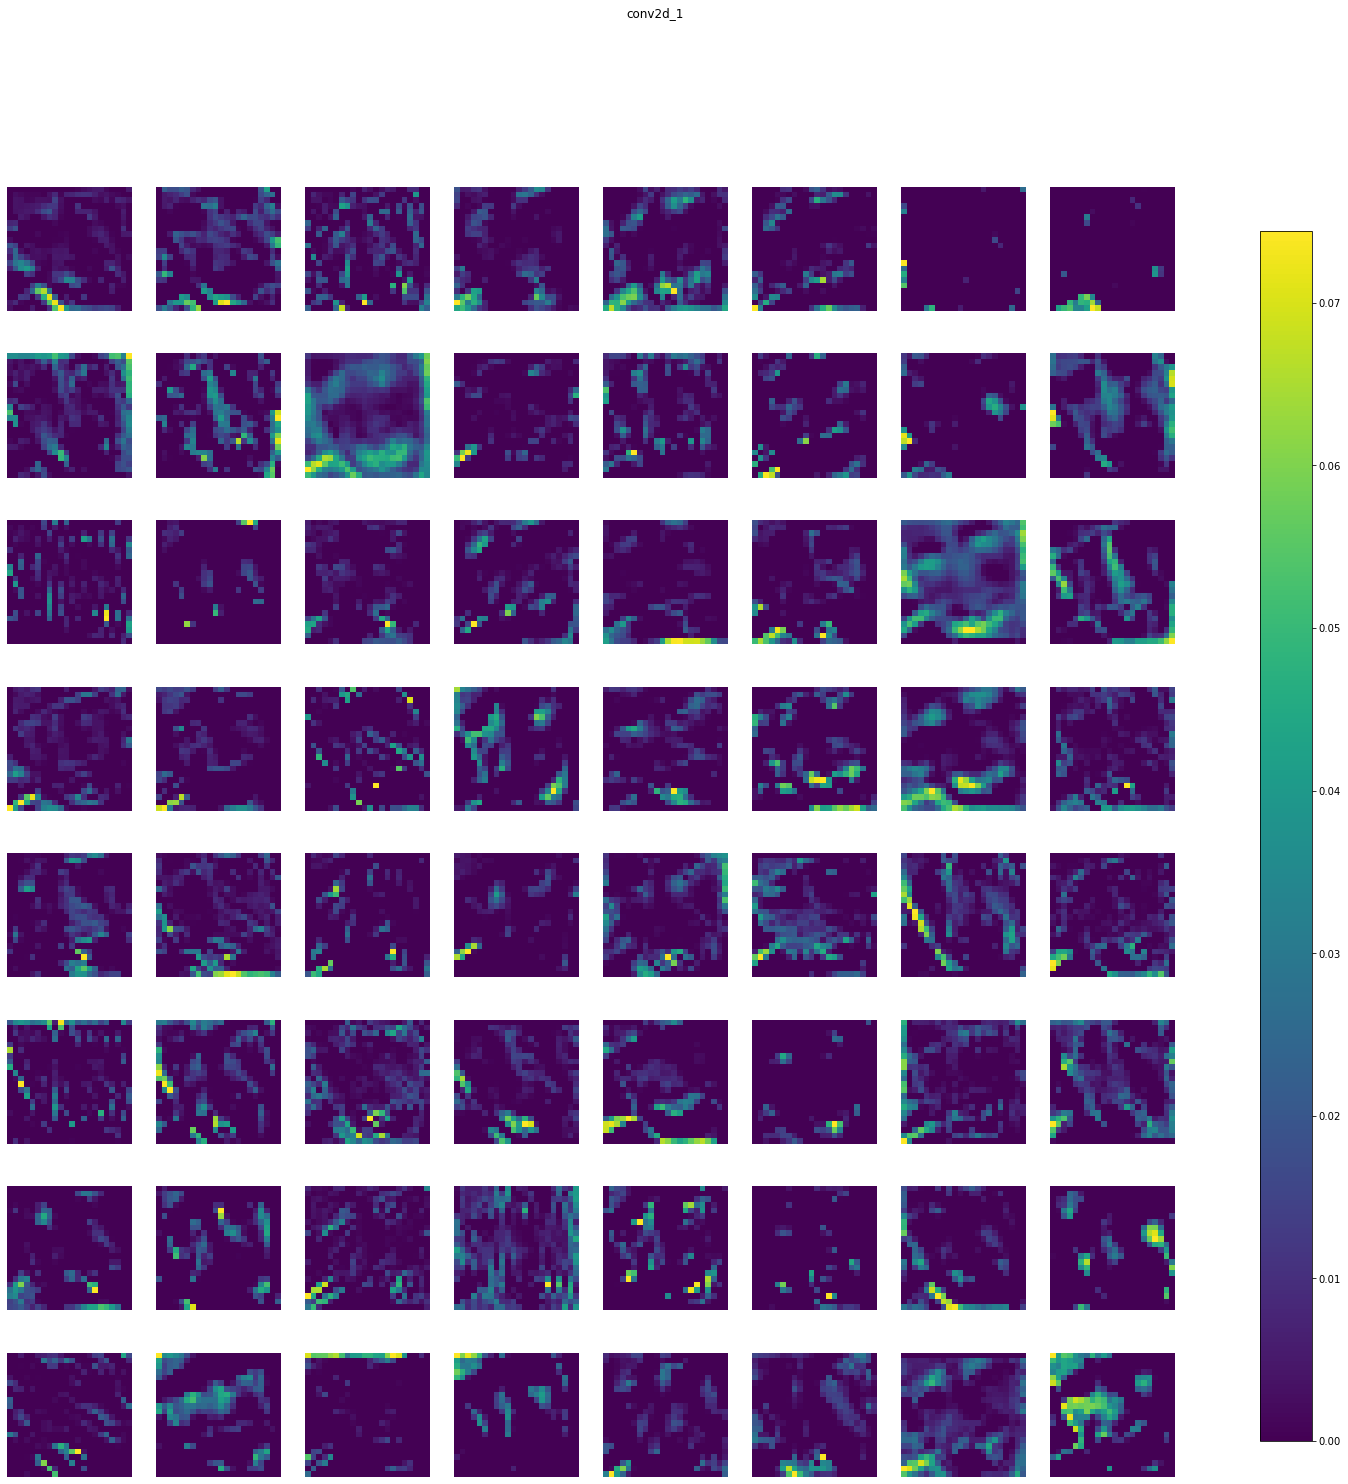

max_pooling2d_1 (1, 11, 11, 64) 


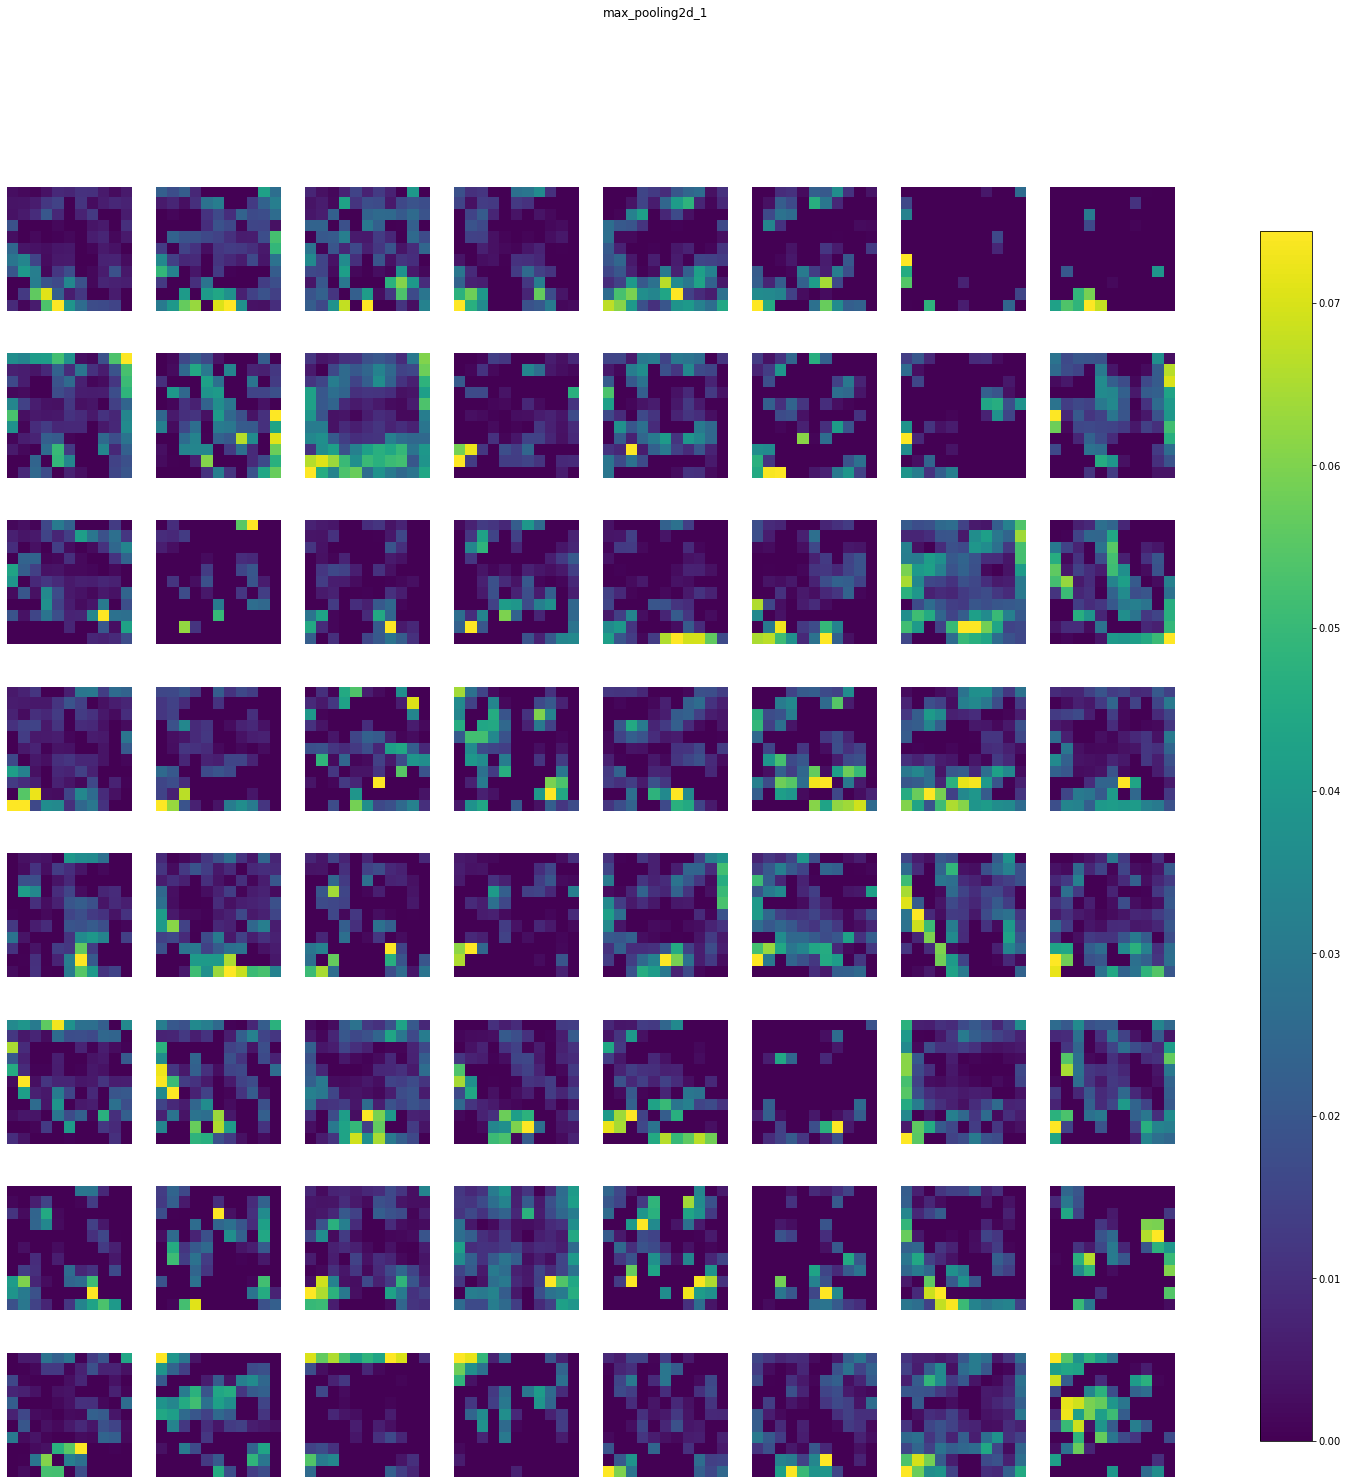

conv2d_2 (1, 9, 9, 128) 


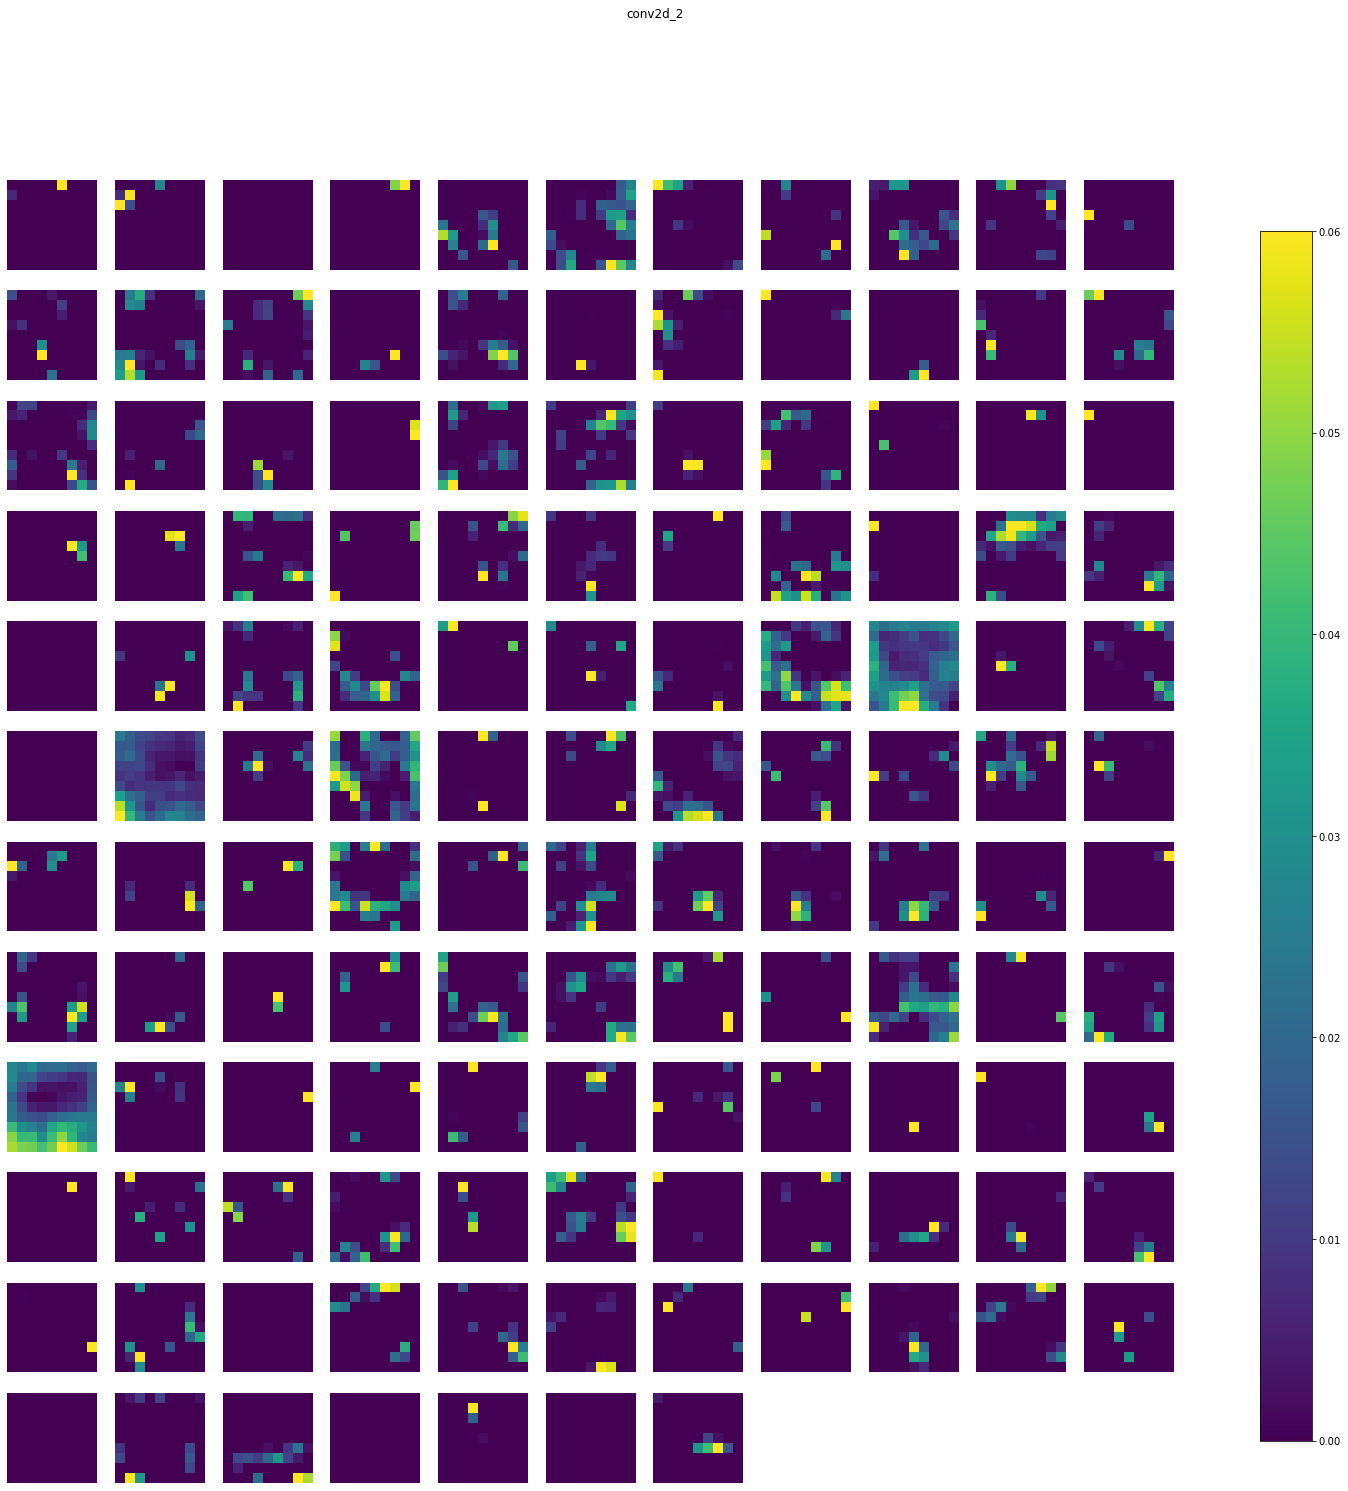

max_pooling2d_2 (1, 4, 4, 128) 


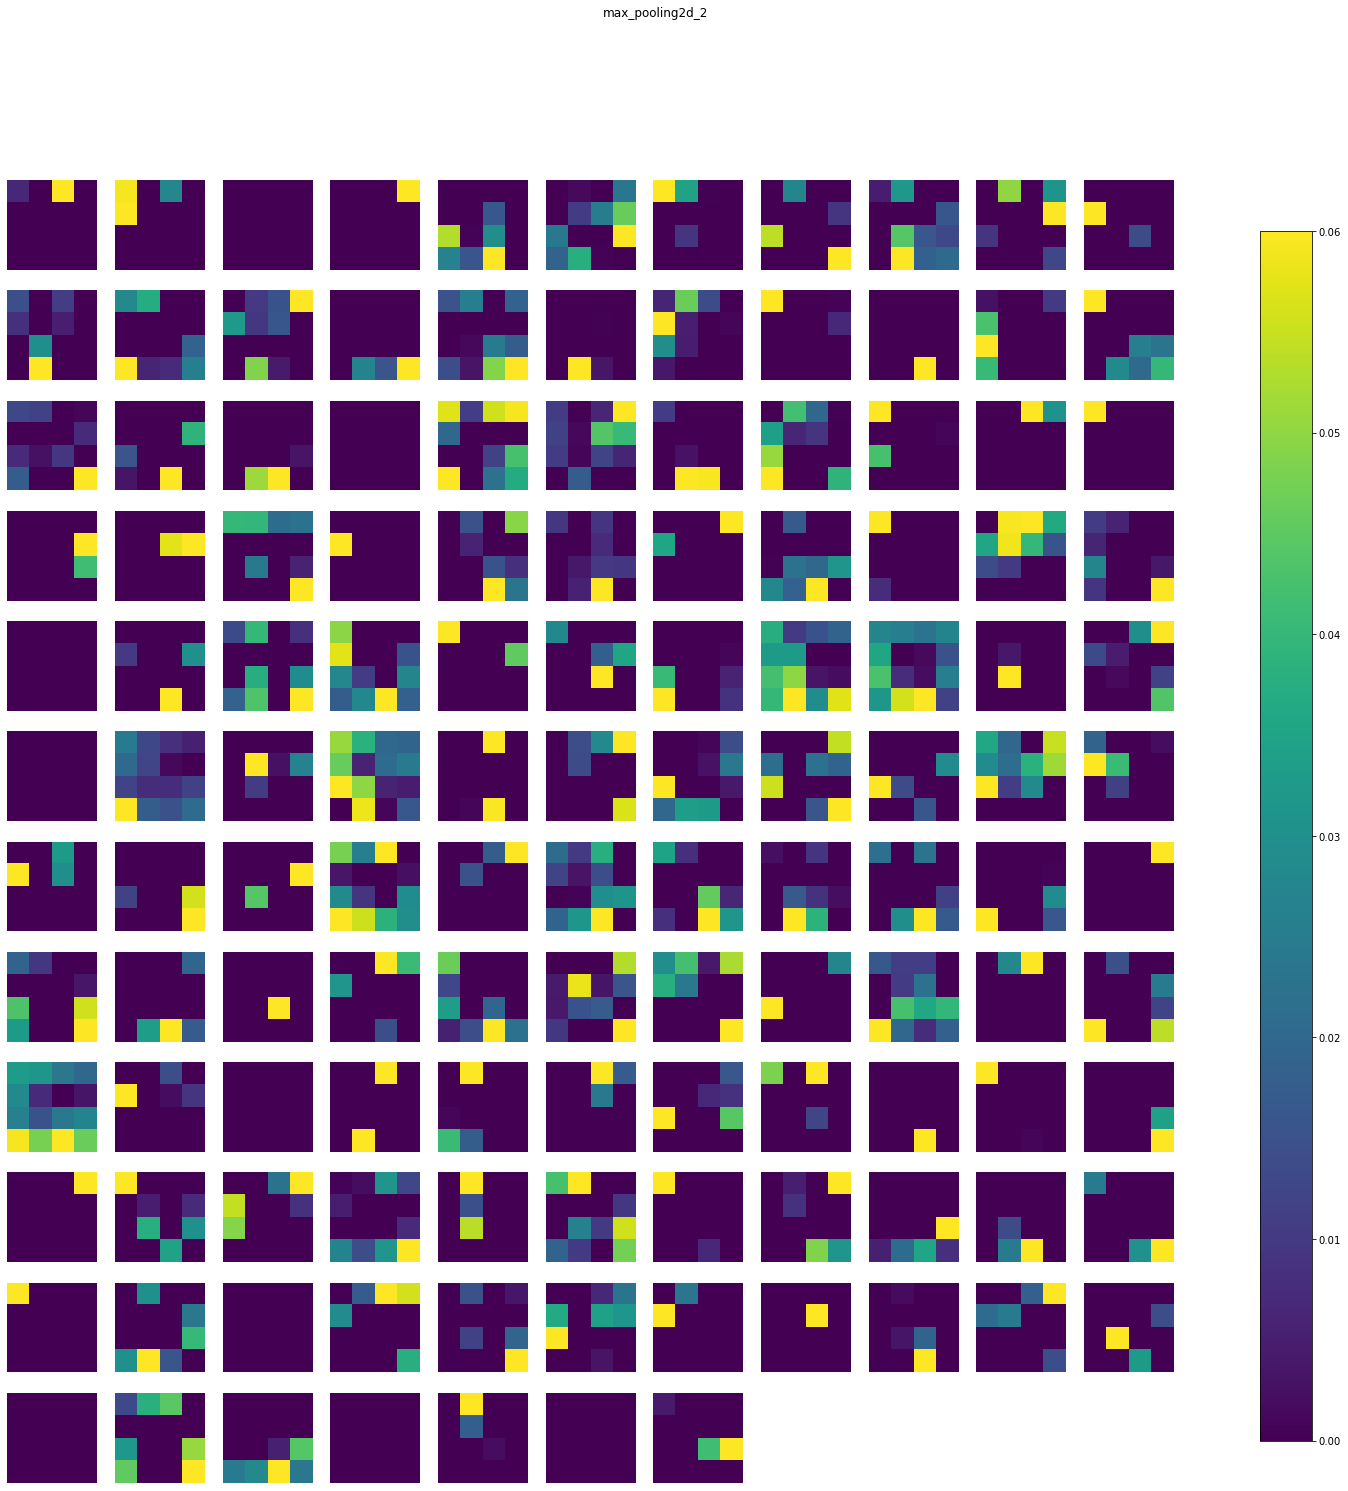

conv2d_3 (1, 2, 2, 256) 


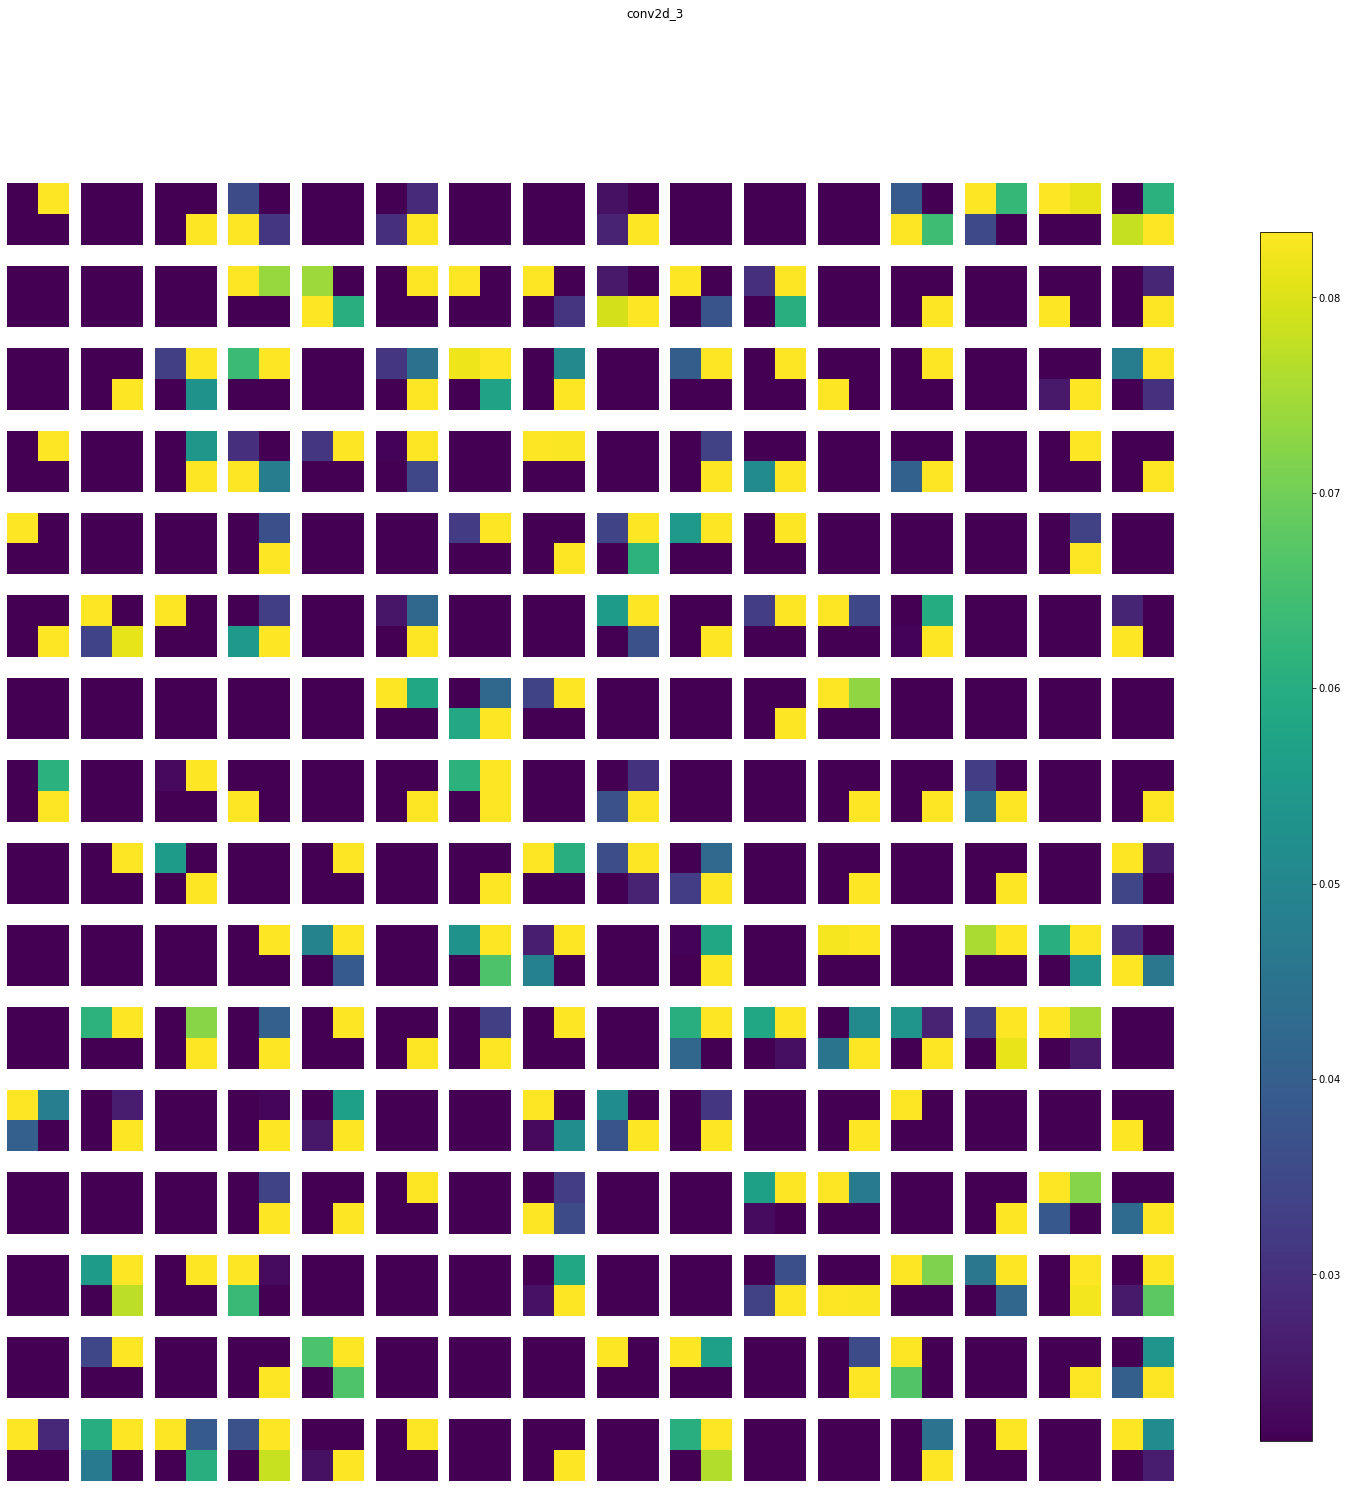

max_pooling2d_3 (1, 1, 1, 256) 


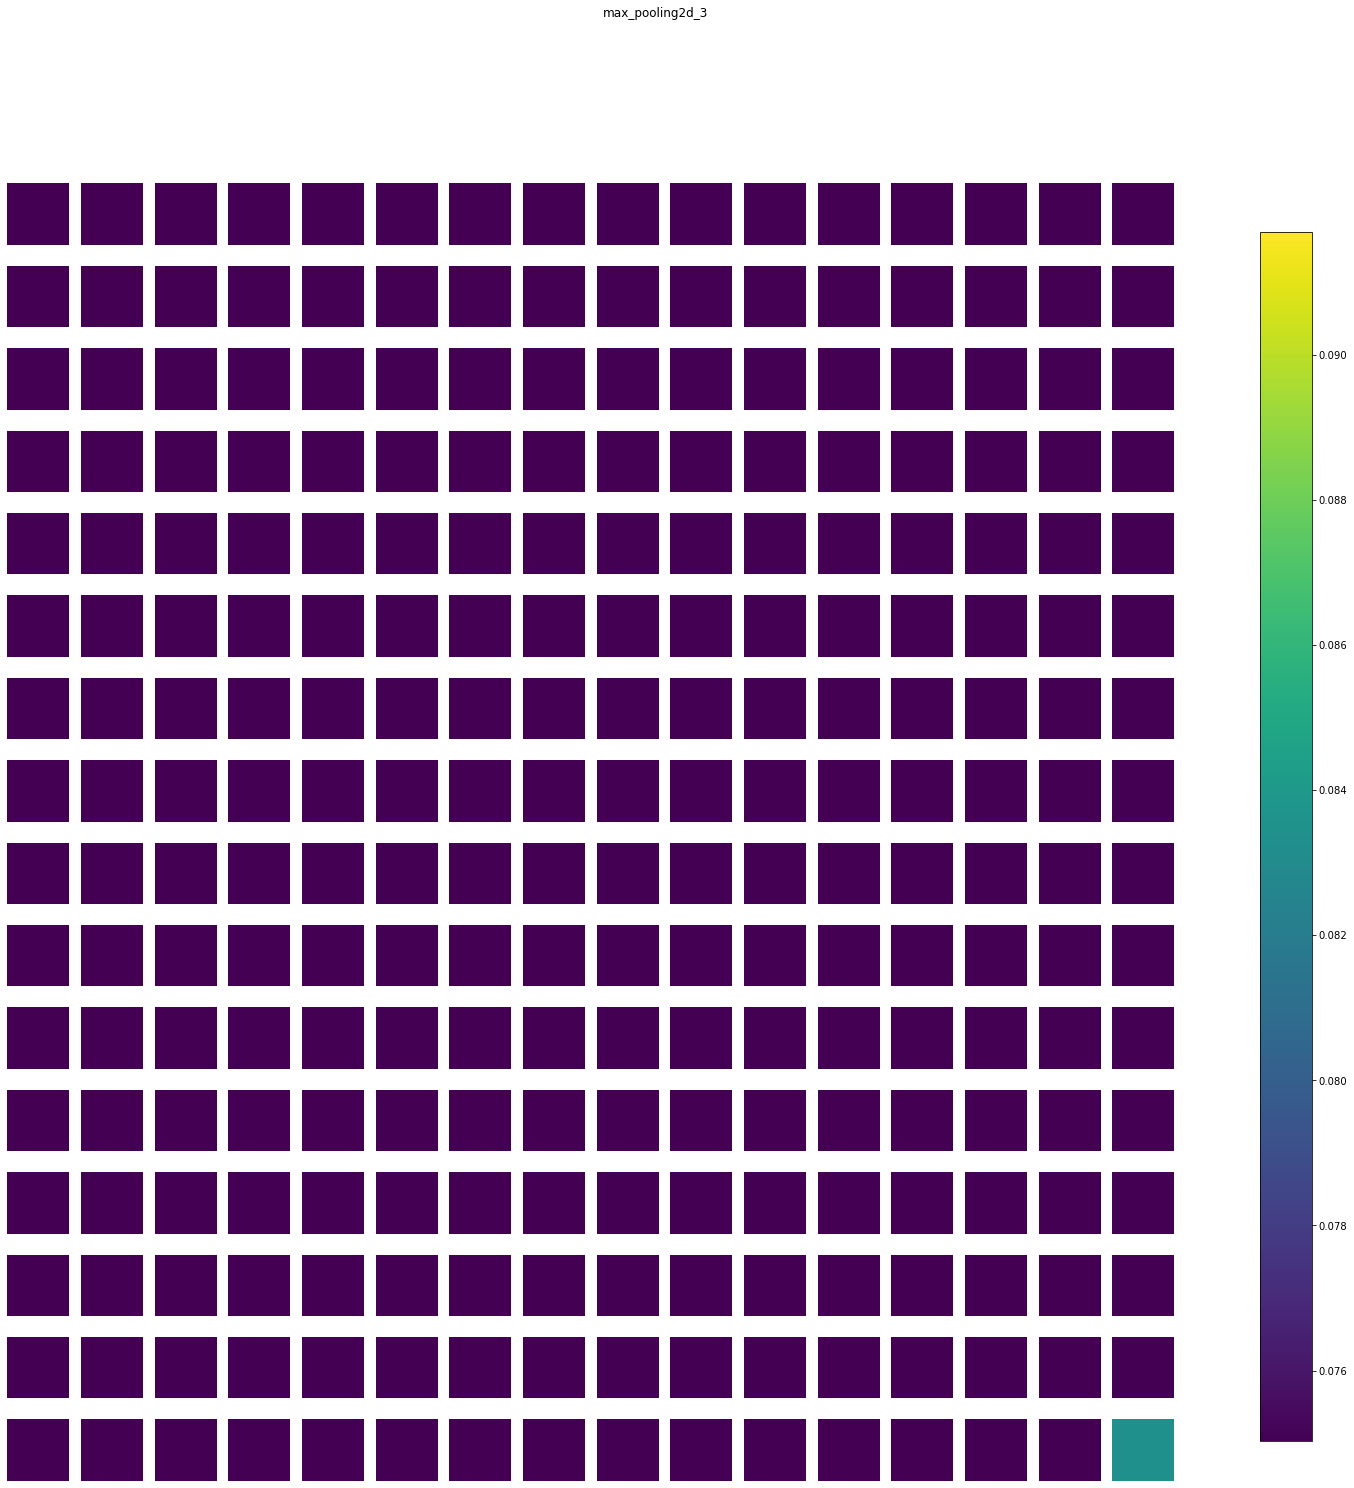

dropout (1, 1, 1, 256) 


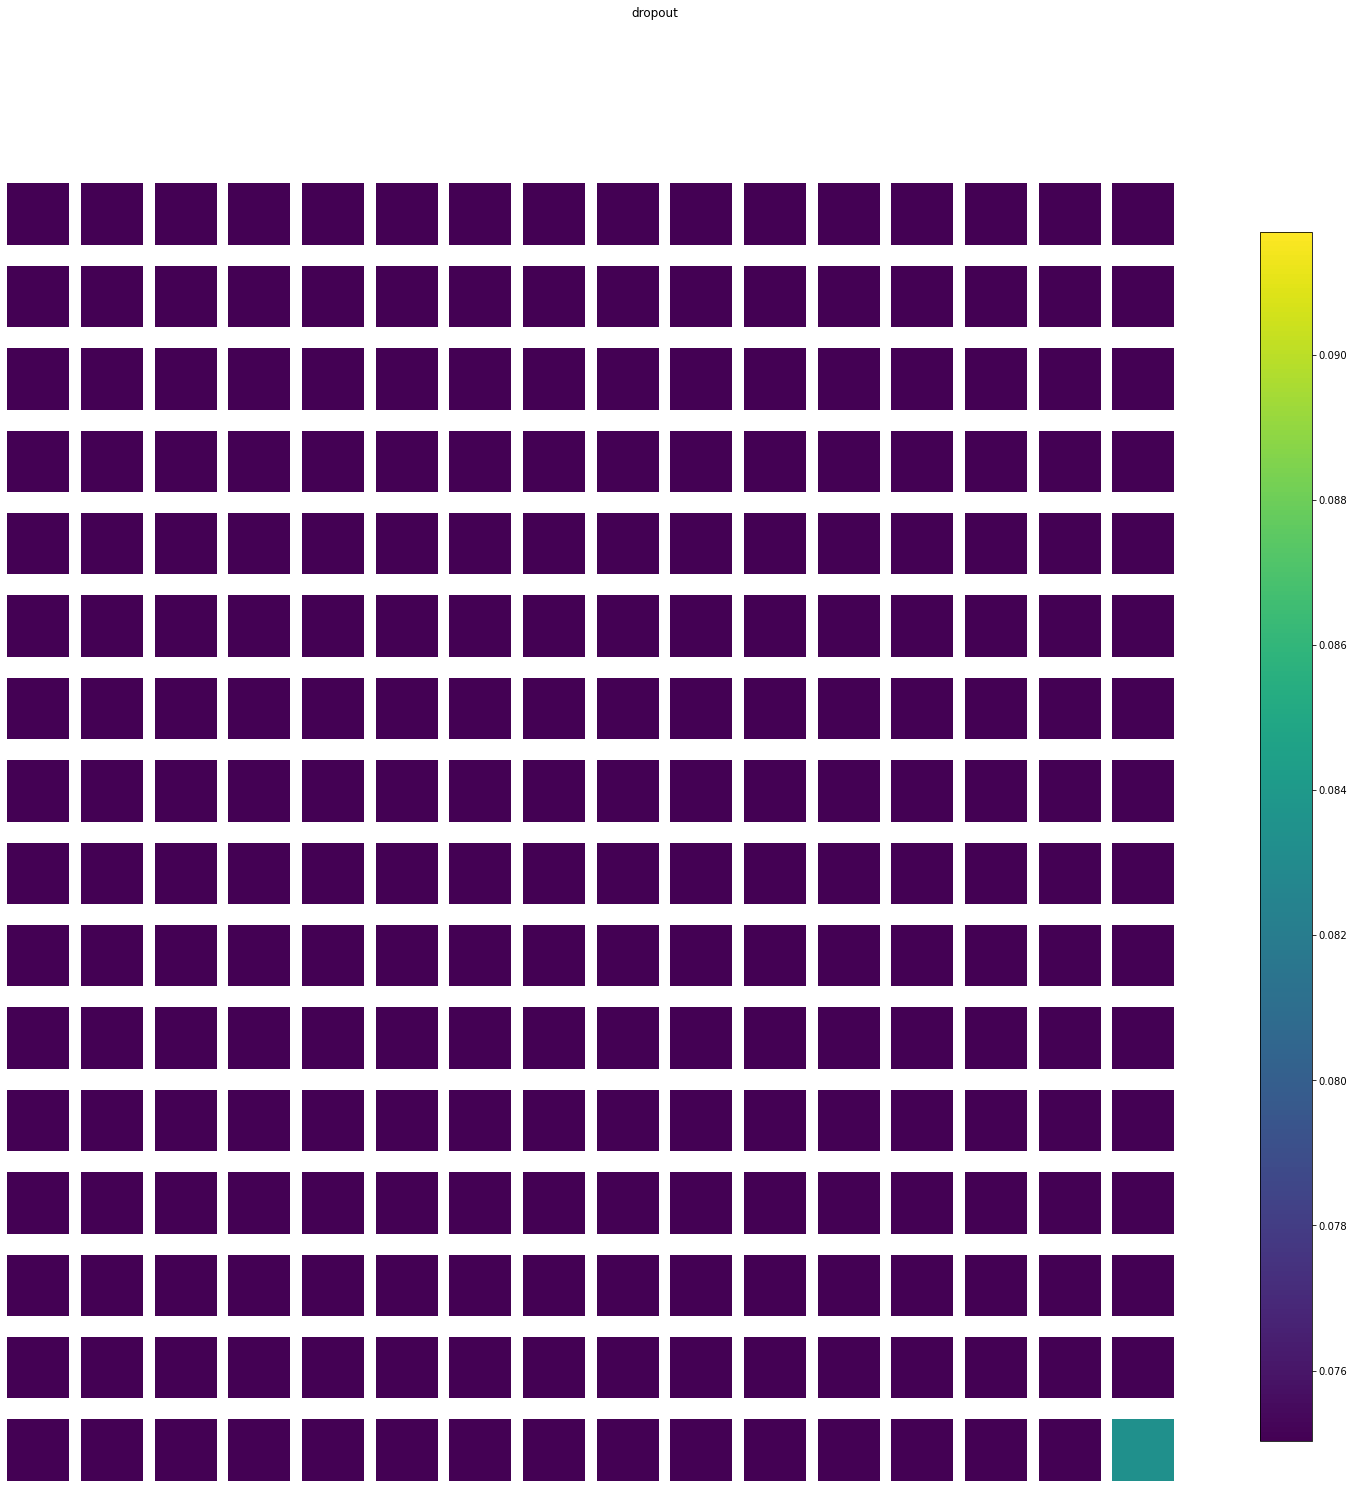

flatten (1, 256) 


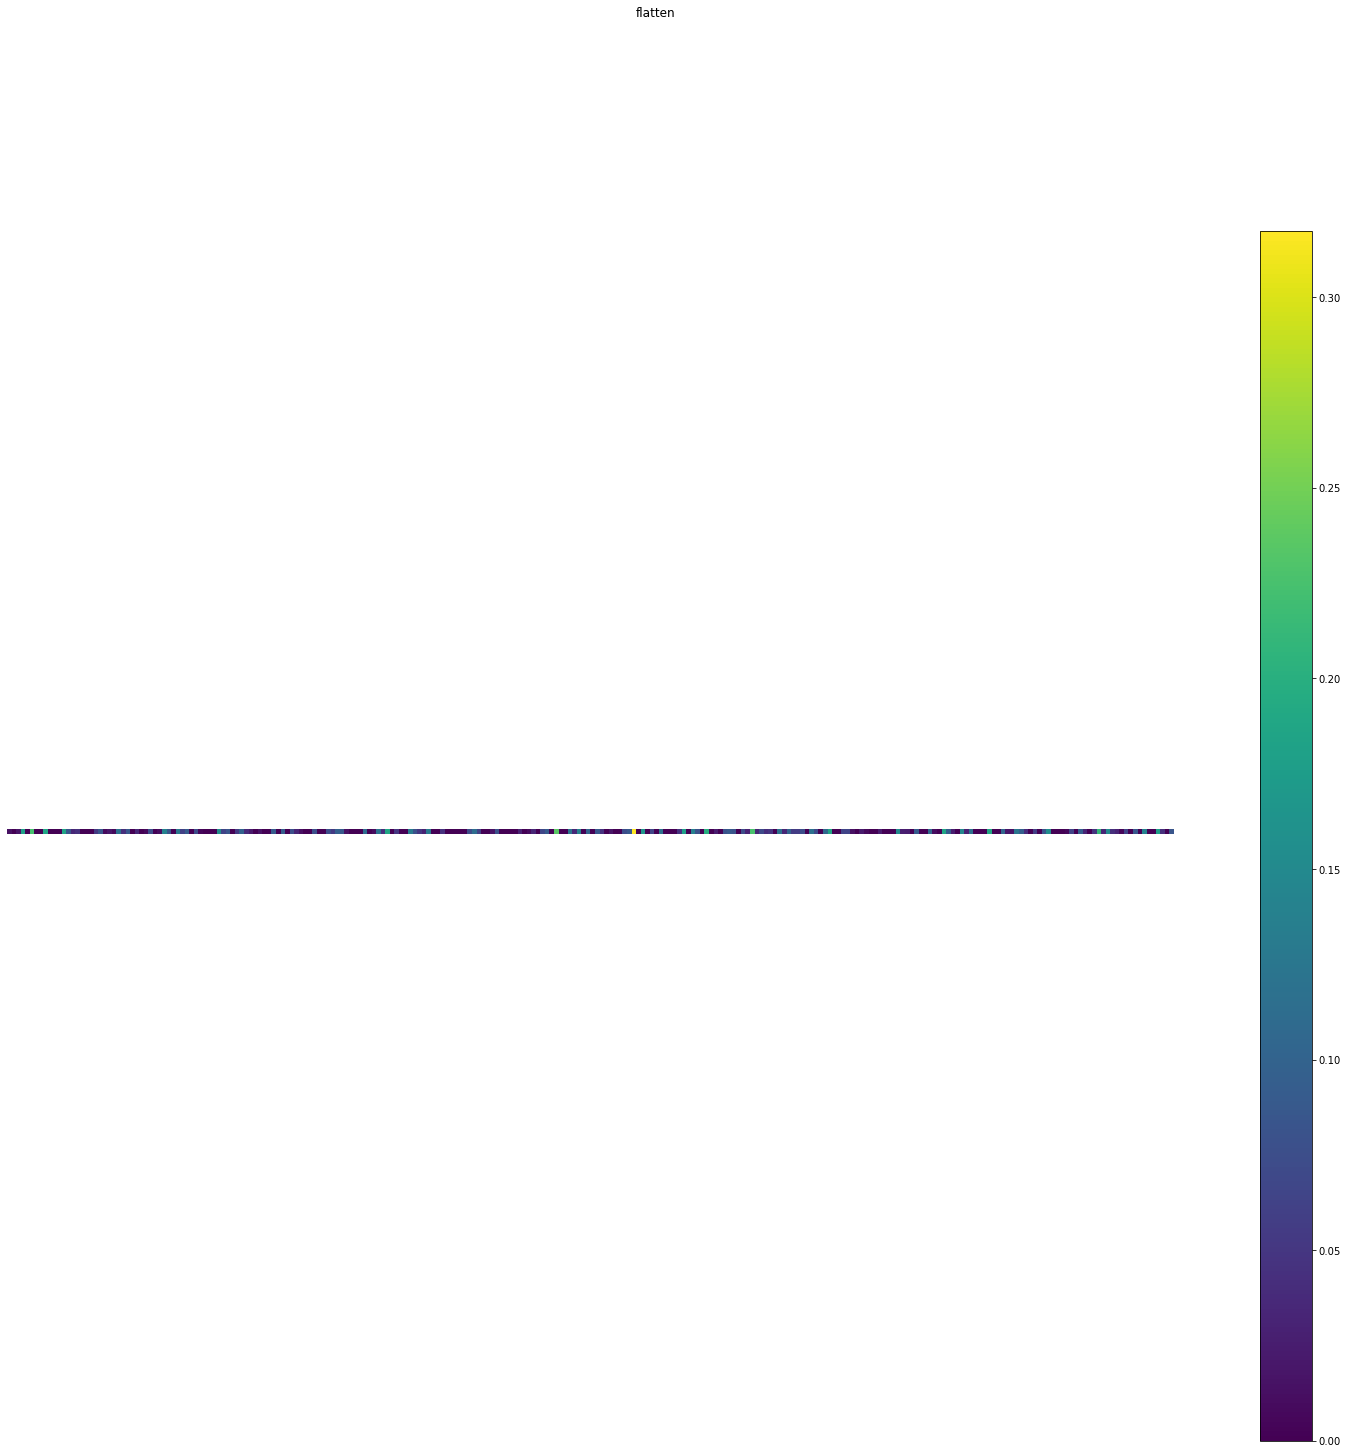

dense (1, 512) 


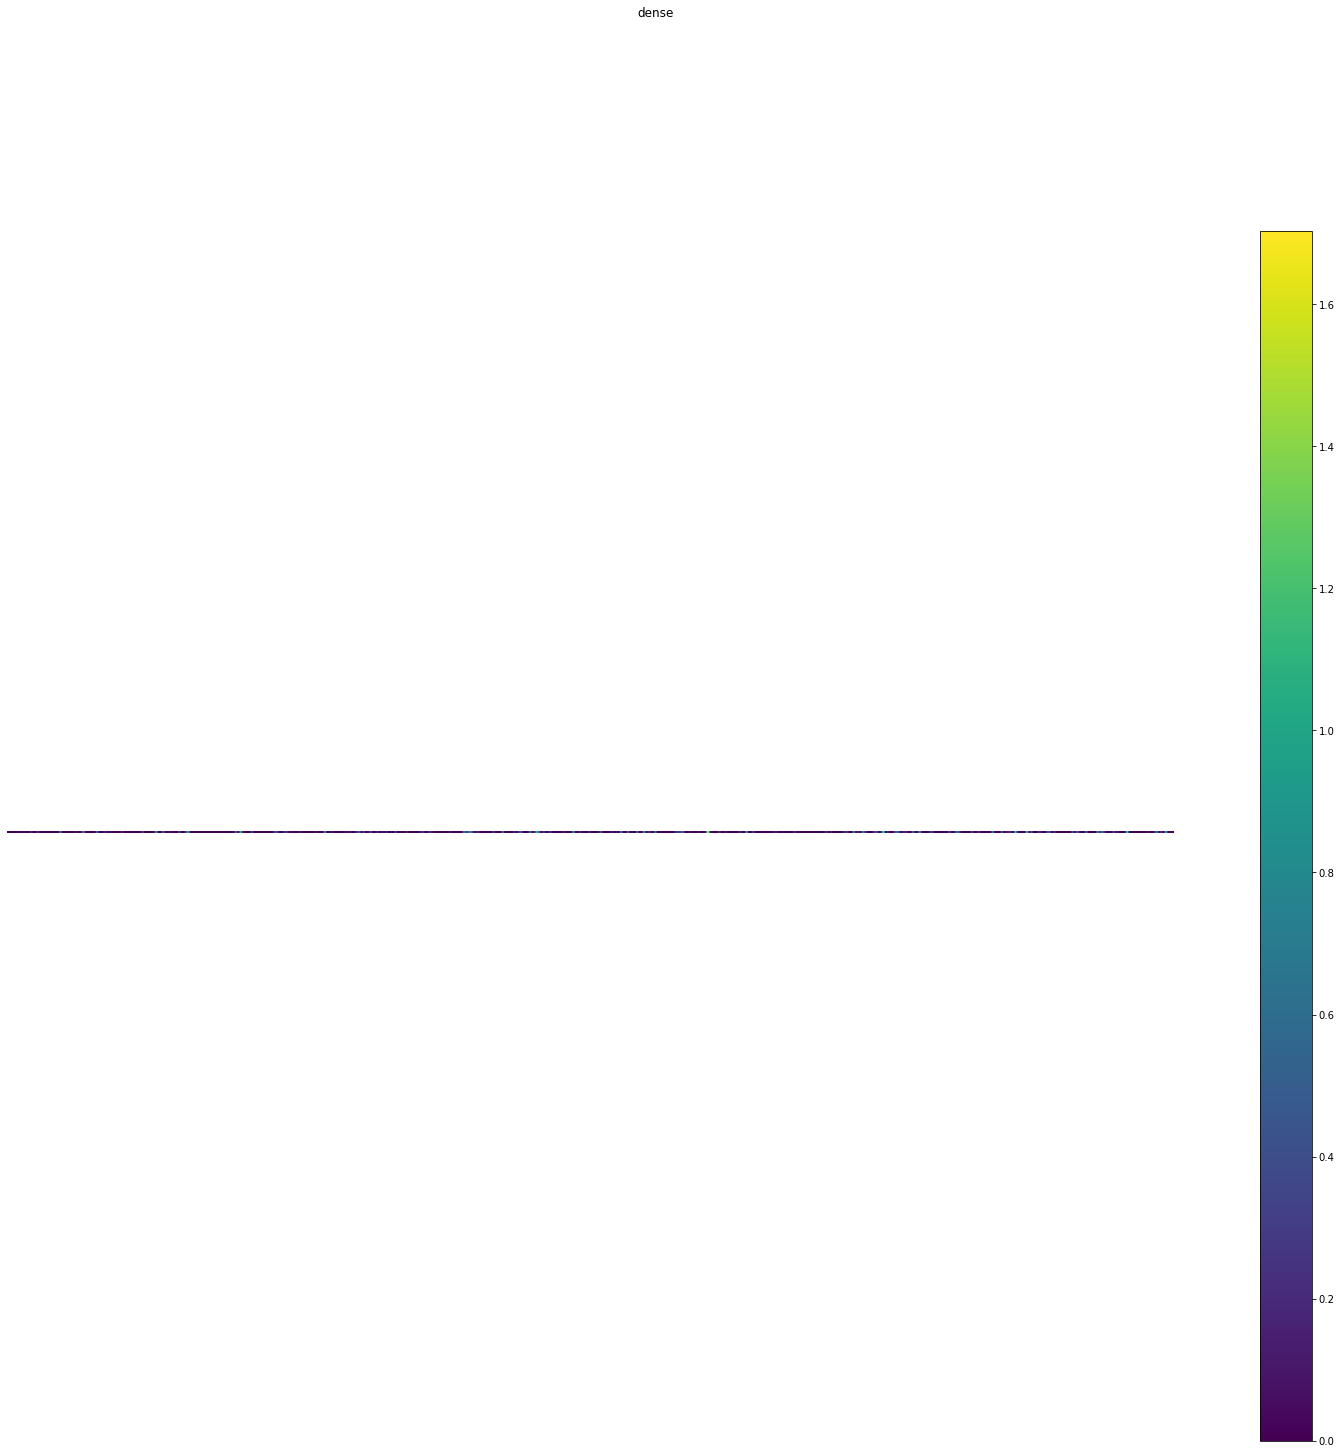

dense_1 (1, 256) 


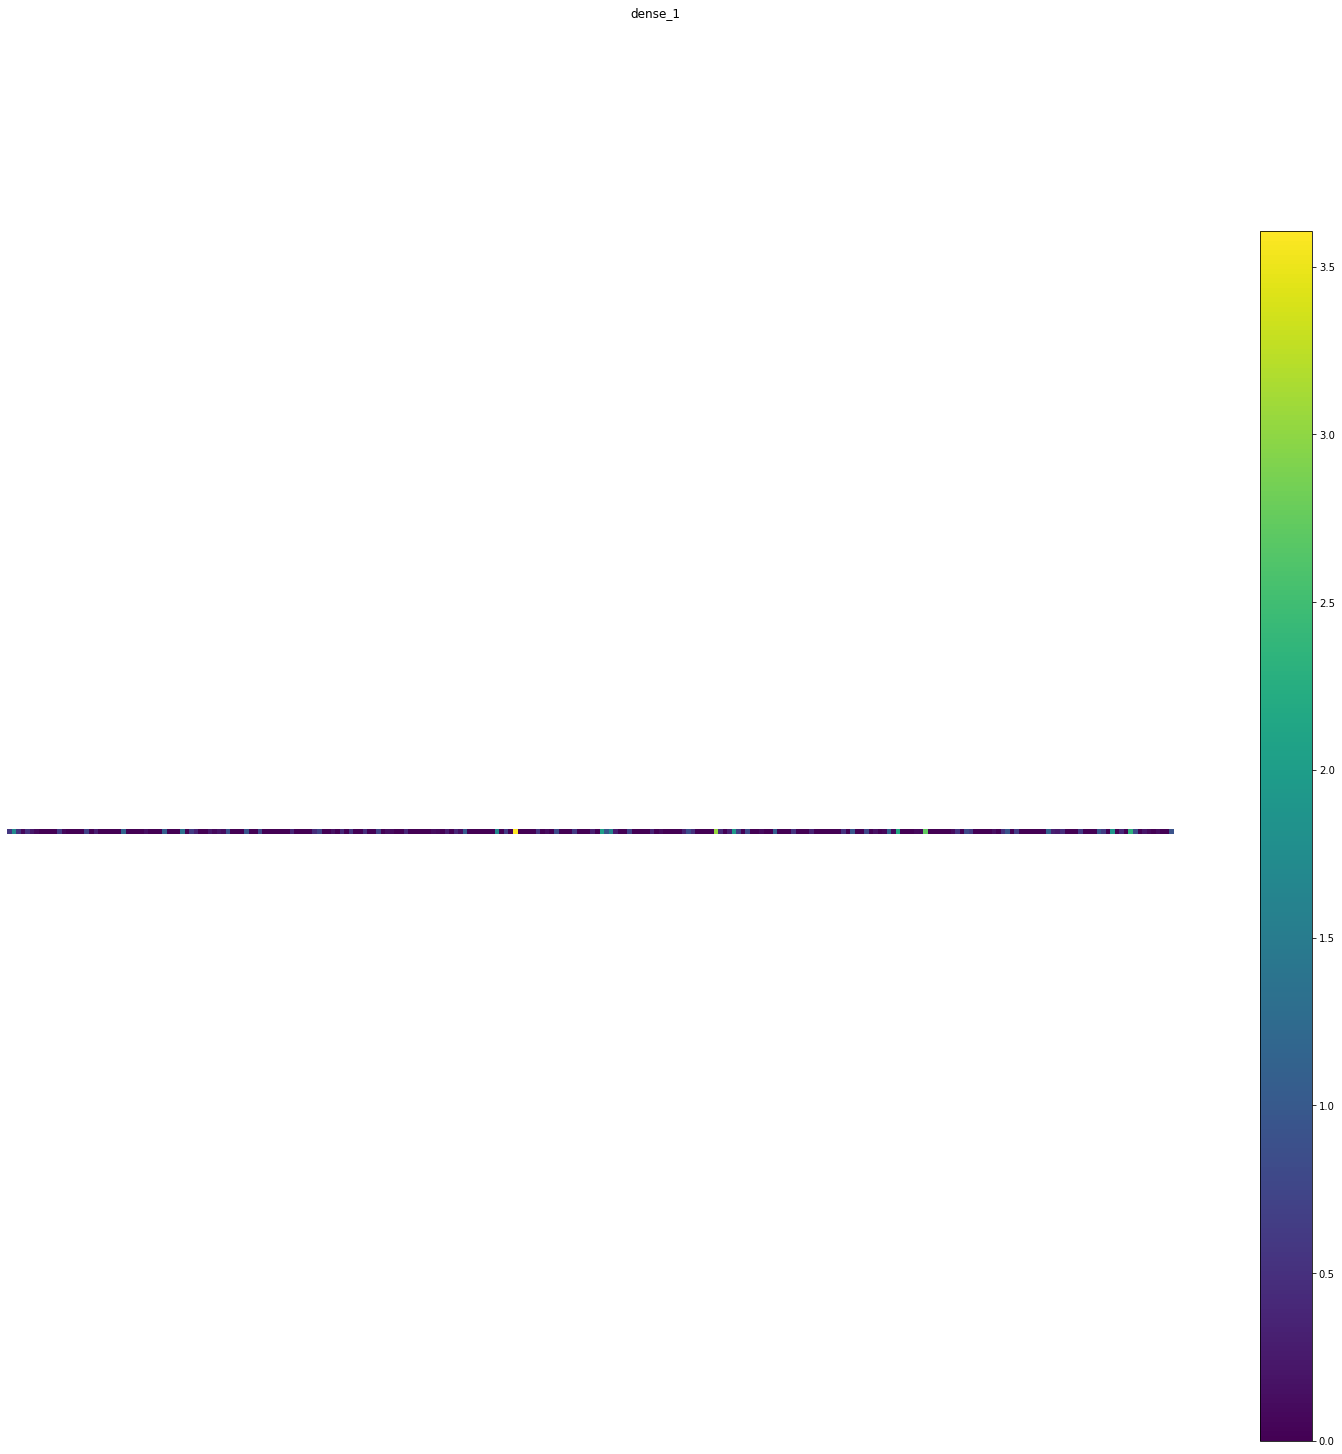

dense_2 (1, 7) 


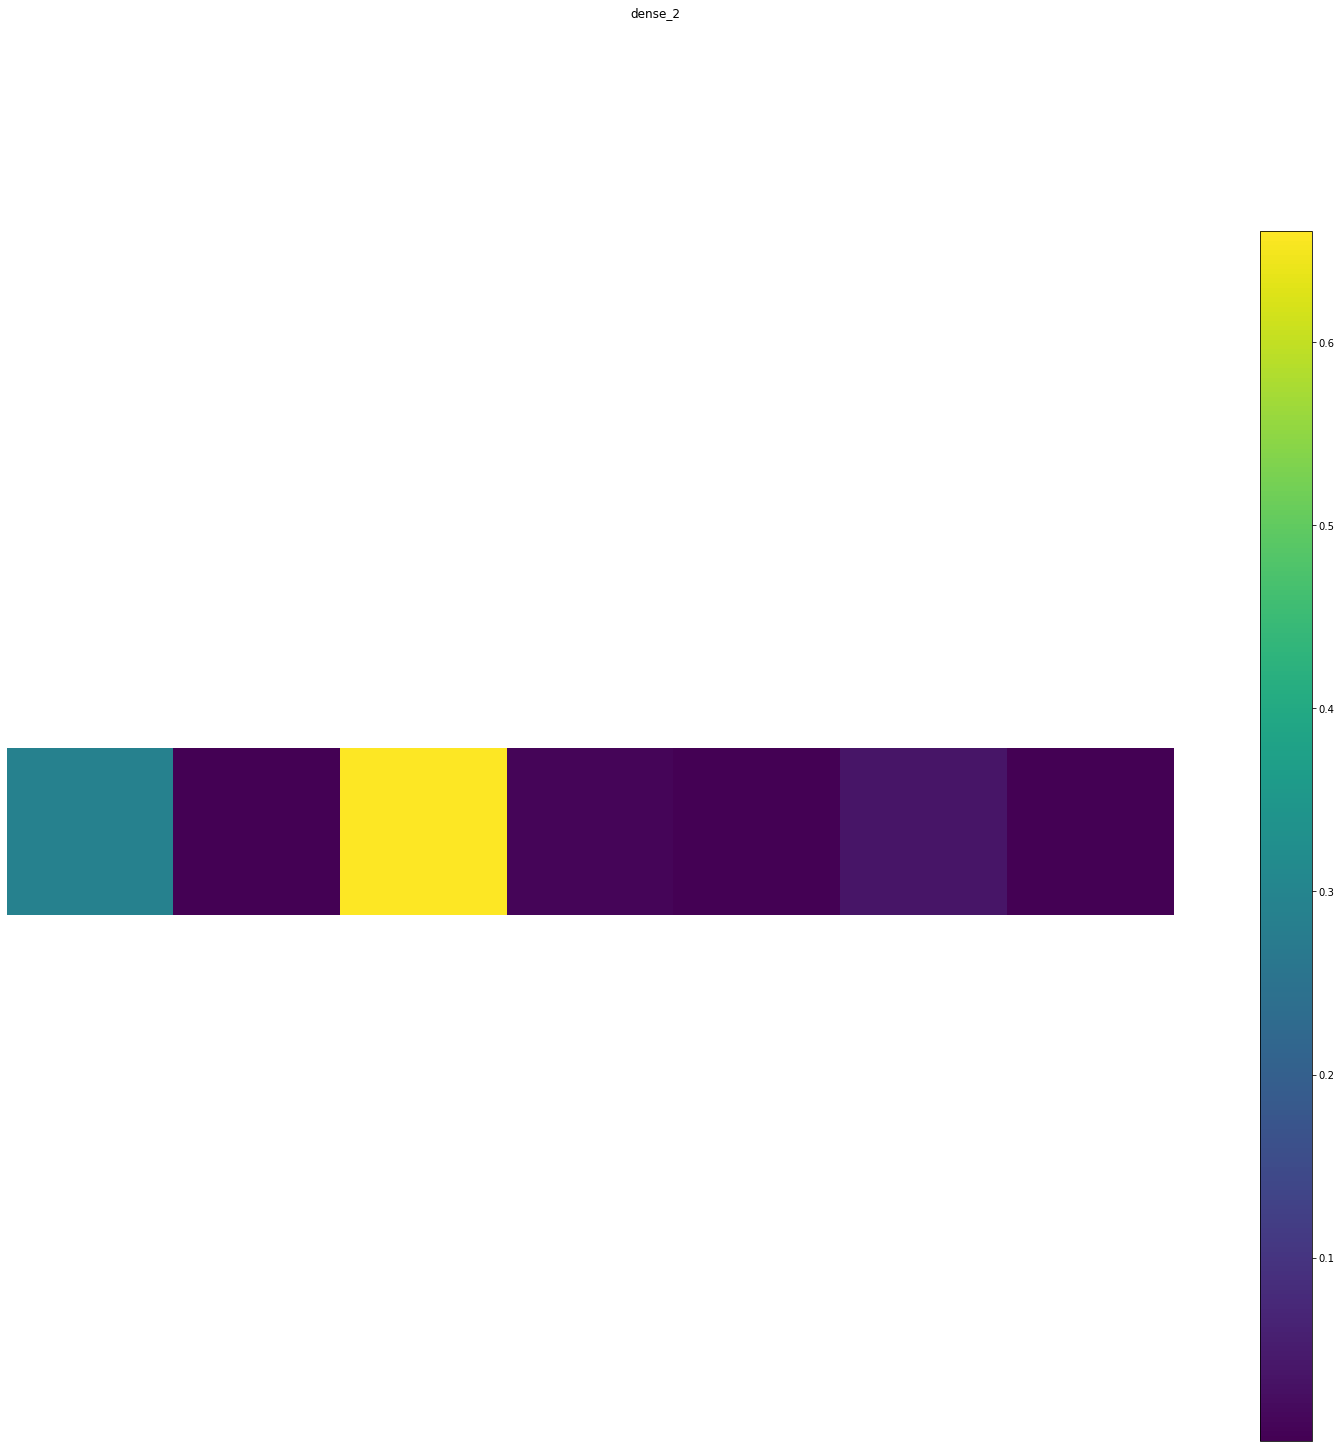

In [73]:
activations = get_activations(model, expand_img_dims(test_images[np.random.randint(len(test_images))]))
display_activations(activations, save=False)